In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import gmaps
from api_keys import g_key
from ipywidgets.embed import embed_minimal_html

In [3]:
toronto_collision= pd.read_csv('Resources/Fatal_Collisions_toronto.csv')
toronto_income= pd.read_csv('Resources/income_toronto.csv')
toronto_income

,Neighbourhood,Median Household Income Before Taxes,"Population, 2016"
0,Agincourt/Malvern,68108,96664
1,Alderwood,83249,12054
2,Banbury-Don Mills/York Mills,90620,38133
3,Bathurst Manor,69634,36961
4,Bay Street Corridor,48737,43466
...,...,...,...
95,Woodbine-Lumsden,74608,7865
96,Wychwood,66089,14349
97,Yonge-Eglinton,80896,11817
98,Yonge-St.Clair,80136,12528


In [4]:
#gather population data - in order to make weighted collisions per area based on population
toronto_income=toronto_income.rename(columns={'Population, 2016':'Population'})
toronto_income

,Neighbourhood,Median Household Income Before Taxes,Population
0,Agincourt/Malvern,68108,96664
1,Alderwood,83249,12054
2,Banbury-Don Mills/York Mills,90620,38133
3,Bathurst Manor,69634,36961
4,Bay Street Corridor,48737,43466
...,...,...,...
95,Woodbine-Lumsden,74608,7865
96,Wychwood,66089,14349
97,Yonge-Eglinton,80896,11817
98,Yonge-St.Clair,80136,12528


In [5]:
# toronto_collision.columns
# toronto_income.columns

In [6]:
# Clean column layouts
toronto_collision=toronto_collision[['X', 'Y', 'District','Neighbourhood','FATAL_NO','YEAR', 'VEHTYPE','DATE', 'Hour']]
toronto_collision=toronto_collision.rename(columns={'X':'Longitude',
                                                    'Y':'Latitude',
                                                    'YEAR':'Year',
                                                    'FATAL_NO':'Number of Fatalities',
                                                    'VEHTYPE':'Vehicle Type',
                                                    'DATE':'Date', 
                                                    })

In [7]:
toronto_income=toronto_income.rename(columns={'Median Household Income Before Taxes':'Median Income'})

In [8]:
toronto_collision.head()
# toronto_income.head()

,Longitude,Latitude,District,Neighbourhood,Number of Fatalities,Year,Vehicle Type,Date,Hour
0,-79.227590,43.816245,Scarborough,Agincourt/Malvern,2.0,2012.0,Other,2012-01-12T05:00:00.000Z,5.0
1,-79.447742,43.637614,Toronto and East York,South Parkdale/King West,58.0,2013.0,"Automobile, Station Wagon",2013-11-29T05:00:00.000Z,5.0
2,-79.259883,43.716773,Scarborough,Clairlea-Birchmount,33.0,2018.0,Motorcycle,2018-06-14T04:00:00.000Z,5.0
3,-79.316890,43.821345,Scarborough,Bayview Woods-Steeles/Hillcrest Village,16.0,2010.0,Other,2010-04-13T04:00:00.000Z,5.0
4,-79.574641,43.728129,Etobicoke York,Rexdale-Kipling,40.0,2014.0,,2014-11-09T05:00:00.000Z,5.0


In [9]:
# toronto_collision.Neighbourhood.nunique()
# toronto_income.Neighbourhood.nunique()

In [10]:
toronto_data=pd.merge(toronto_collision,toronto_income, how='outer',on='Neighbourhood')
toronto_data=toronto_data.dropna()
toronto_data.head()

,Longitude,Latitude,District,Neighbourhood,Number of Fatalities,Year,Vehicle Type,Date,Hour,Median Income,Population
0,-79.227590,43.816245,Scarborough,Agincourt/Malvern,2.0,2012.0,Other,2012-01-12T05:00:00.000Z,5.0,68108.0,96664.0
1,-79.263774,43.801421,Scarborough,Agincourt/Malvern,57.0,2015.0,,2015-11-24T05:00:00.000Z,6.0,68108.0,96664.0
2,-79.200870,43.805159,Scarborough,Agincourt/Malvern,49.0,2015.0,"Automobile, Station Wagon",2015-10-06T04:00:00.000Z,6.0,68108.0,96664.0
3,-79.224290,43.816945,Scarborough,Agincourt/Malvern,36.0,2009.0,Other,2009-10-23T04:00:00.000Z,7.0,68108.0,96664.0
4,-79.289455,43.785750,Scarborough,Agincourt/Malvern,24.0,2014.0,,2014-08-16T04:00:00.000Z,5.0,68108.0,96664.0


In [11]:
# save Cleaned Data Frame
toronto_data.to_csv('Output/toronto_cleaned.csv')

 p-value is 4.136528557707383e-59; Normally distributed


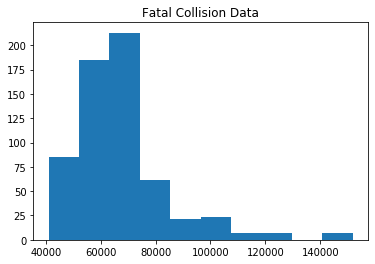

In [12]:
# Histogram for data collected for median income
plt.hist(toronto_data['Median Income'])
plt.title('Fatal Collision Data')
plt.savefig('Output/income_hist.png')
# More collisions in midrange income brackets (normally distributed)
p_value=sts.normaltest(toronto_data['Median Income']) 
print(f' p-value is {p_value[1]}; Normally distributed')

In [13]:
#place nighbourhood and income data into lists
neighbourhoods=list(toronto_data.Neighbourhood.unique())
income=list(toronto_data['Median Income'].unique())
print(len(income))
print(len(neighbourhoods))

100
100


In [14]:
#Create dataframe to hold collisions in each neighbourhood (#Group by neighbourhoods)
hood_collisions=pd.DataFrame(toronto_data.groupby('Neighbourhood')['District'].count())
hood_collisions=hood_collisions.rename(columns={
    'District':'Number of Collisions'})

hood_income=pd.DataFrame(toronto_data.groupby('Neighbourhood')['Median Income'].min())

hood_data=pd.merge(hood_collisions,hood_income, on='Neighbourhood')
hood_data=hood_data.sort_values('Median Income',ascending=False)
hood_data

,Number of Collisions,Median Income
Neighbourhood,,
Lawrence Park South,4,151885.0
Kingsway South,1,151552.0
Lawrence Park North,2,144963.0
Leaside-Bennington,4,126930.0
Forest Hill South,3,119484.0
...,...,...
Flemingdon Park,7,48917.0
Bay Street Corridor,6,48737.0
Weston,2,45696.0


In [18]:
location_first=toronto_data.groupby('Neighbourhood').first()
location_first=location_first[['Latitude','Longitude','District','Population']]

In [19]:
#merge to final table
toronto_hood_data=pd.merge(hood_data,location_first,left_index=True, right_index=True )
# toronto_hood_data=pd.merge(toronto_hood_data, toronto_population, on=index)
toronto_hood_data['City']='Toronto'
toronto_hood_data=toronto_hood_data[['Number of Collisions','Latitude','Longitude','Median Income','District','Population','City']]
toronto_hood_data

,Number of Collisions,Latitude,Longitude,Median Income,District,Population,City
Neighbourhood,,,,,,,
Lawrence Park South,4,43.712046,-79.411693,151885.0,North York,16828.0,Toronto
Kingsway South,1,43.657290,-79.509113,151552.0,Etobicoke York,9271.0,Toronto
Lawrence Park North,2,43.725344,-79.402240,144963.0,North York,15179.0,Toronto
Leaside-Bennington,4,43.692008,-79.361987,126930.0,Toronto and East York,10084.0,Toronto
Forest Hill South,3,43.699485,-79.424945,119484.0,Toronto and East York,10732.0,Toronto
...,...,...,...,...,...,...,...
Flemingdon Park,7,43.788645,-79.158690,48917.0,Scarborough,43041.0,Toronto
Bay Street Corridor,6,43.658744,-79.389987,48737.0,Toronto and East York,43466.0,Toronto
Weston,2,43.703245,-79.525990,45696.0,Etobicoke York,29090.0,Toronto


In [20]:
# Save Final table
toronto_hood_data.to_csv('Output/toronto_table.csv')

In [26]:
#Dependent varaible is collisions (y)
x_axis=toronto_hood_data['Median Income']
y_axis=toronto_hood_data['Number of Collisions']
population_size=toronto_hood_data['Population']

Neighbourhood
Lawrence Park South     16828.0
Kingsway South           9271.0
Lawrence Park North     15179.0
Leaside-Bennington      10084.0
Forest Hill South       10732.0
                         ...   
Flemingdon Park         43041.0
Bay Street Corridor     43466.0
Weston                  29090.0
Kensington-Chinatown    17945.0
North St.James Town     18675.0
Name: Population, Length: 100, dtype: float64

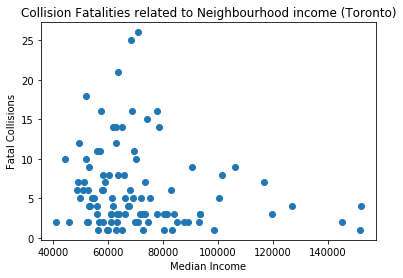

In [25]:
plt.scatter(x_axis,y_axis)
plt.title('Collision Fatalities related to Neighbourhood income (Toronto)')
plt.xlabel('Median Income')
plt.ylabel('Fatal Collisions')
plt.savefig('Output/collisions_v_income.png')

In [19]:
# use google maps to create heat map
gmaps.configure(api_key=g_key)

In [20]:
locations = toronto_hood_data[["Latitude", "Longitude"]].astype(float)

collision_map = gmaps.figure(center=(43.72,-79.3), zoom_level=10.5)
heatmap_layer = gmaps.heatmap_layer(locations)
collision_map.add_layer(heatmap_layer)
heatmap_layer.gradient = [
    (0,0,0,0),
    (0,255,255,0.4),
    (255,0,255,0.8)]


collision_map
embed_minimal_html('Output/collision_heatmap.html', views=[collision_map])

TraitError: The 'locations' trait of a Heatmap instance must be of length 1 <= L <= 9223372036854775807, but a value of [] was specified.

In [ ]:
collision_map

In [ ]:
income= toronto_hood_data['Median Income']
income_map = gmaps.figure(center=(43.72,-79.3), zoom_level=10.5)
heatmap_layer_income = gmaps.heatmap_layer(locations, weights=income,max_intensity=90000 , point_radius=10.0,gradient=[(0,0,0,0),(0,255,255,.8),(255,0,255,1)])
income_map.add_layer(heatmap_layer_income)

income_map
embed_minimal_html('Output/income_heatmap.html', views=[income_map])

In [ ]:
income_map